In [57]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

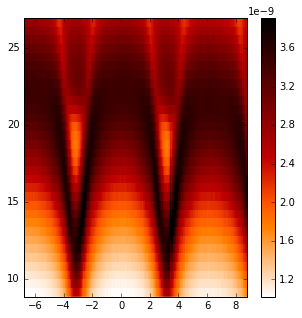

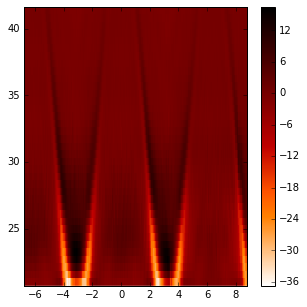

In [5]:
data_abs = prepare_data("data_npy/227_dd.npy", 8, 45, chop=True)
data_lc = prepare_data("data_npy/227.npy", 8, 40)
a, b = calibration_phase_axis(data_abs, data_lc, i1=30, e1=42, i2=100, e2=125, plot=False)
plot_datascan(data_lc)
plot_datascan(data_abs)

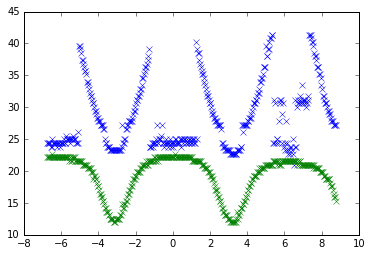

In [7]:
# Peak position are simply chosen as the maxima of each data cut for a fixed phase.
lc_line = np.array([data_lc['x'][np.argmax(d)] for d in data_lc['z']])
abs_line = np.array([data_abs['x'][np.argmax(d)] for d in data_abs['z']])
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(data_abs['y'], abs_line, 'x')
plt.plot(data_lc['y'], lc_line, 'x')

In [8]:
# These spurious points are removed manually; then we zip phi and V coordinates together
lc_line = zip(data_lc['y'], lc_line)
abs_line = zip(np.concatenate((data_abs['y'][44:142], data_abs['y'][209:303], data_abs['y'][363:])),
               np.concatenate((abs_line[44:142], abs_line[209:303], abs_line[363:])))

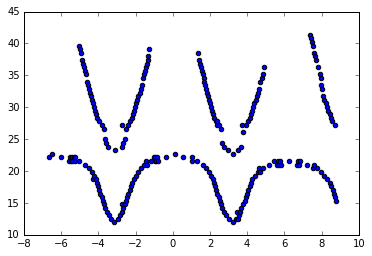

In [21]:
lines = merge_points(lc_line, abs_line)
# This is the final dataset
# No error bars (yet..)
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Plot with one free parameter

In [40]:
%%capture
p0 = [0.9]
fit_all = fit_abs_model(lines, 123, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [41]:
fit_all['popt']

array([ 0.93241781])

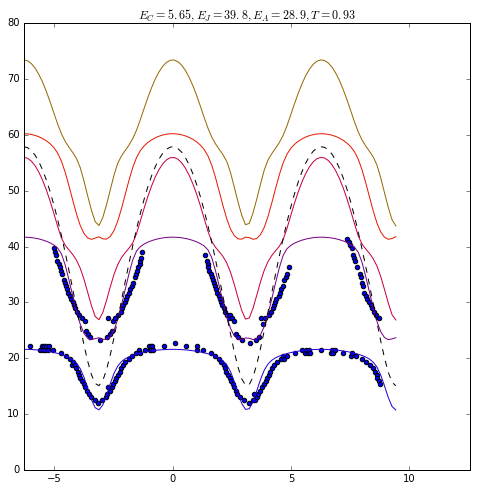

In [43]:
plot_fit_results(fit_all, lines, Ej=39.8, Ec=5.65, Ea=28.95)

## Plot with two free parameters

In [44]:
%%capture
p0 = [28.95, 0.932]
fit_1 = fit_abs_model(lines, 123, p0, Ej=39.8, Ec=5.65)

In [45]:
fit_1['popt']

array([ 24.63067446,   0.87332371])

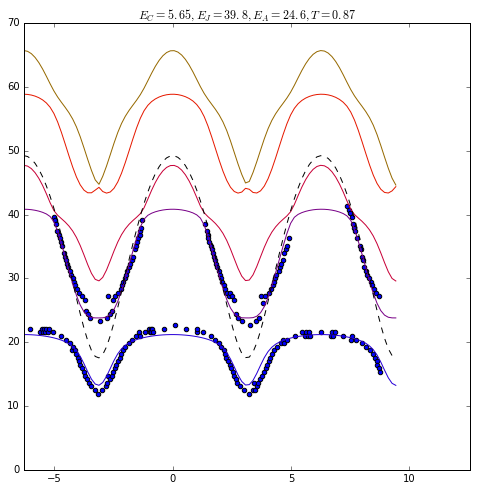

In [46]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65)

## Plot with three free parameters

In [49]:
%%capture
p0 = [7, 25, 0.87]
fit_2 = fit_abs_model(lines, 123, p0, Ej=39.8)

In [50]:
fit_2['popt']

array([  5.64532804,  24.63206329,   0.87326744])

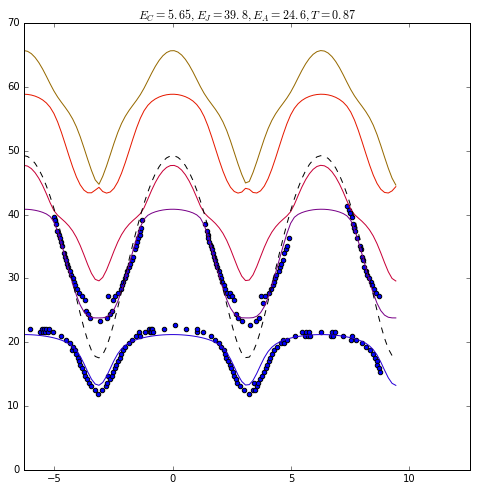

In [51]:
plot_fit_results(fitres_all_fixed, lines, Ej=39.8, Ec=5.65)

## Plot with four free parameters

In [59]:
%%capture
p0 = [5, 30, 25, 0.85]
fit_3 = fit_abs_model(lines, 123, p0, max_tol=5e-6)

In [60]:
fit_3['popt']

array([  9.99999987,  21.44740268,  22.23232497,   0.84995009])

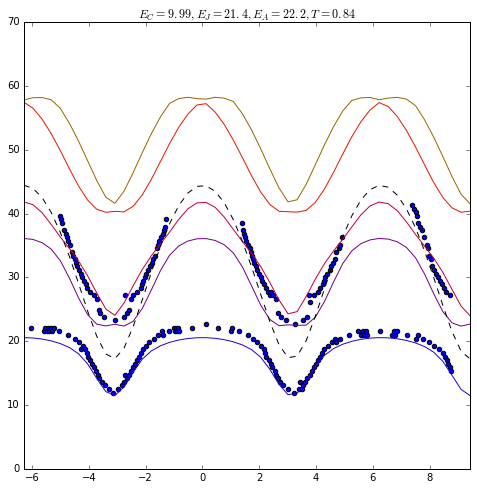

In [61]:
plot_fit_results(fit_3, lines, n_fluxes=50)